In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
951,51,male,42.900,2,yes,southeast,47462.89400
139,22,female,36.000,0,no,southwest,2166.73200
93,35,male,34.770,2,no,northwest,5729.00530
1299,19,female,25.745,1,no,northwest,2710.82855
1128,34,male,32.800,1,no,southwest,14358.36437


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df[["sex","smoker","region"]]=df[["sex","smoker","region"]].apply(LabelEncoder().fit_transform)

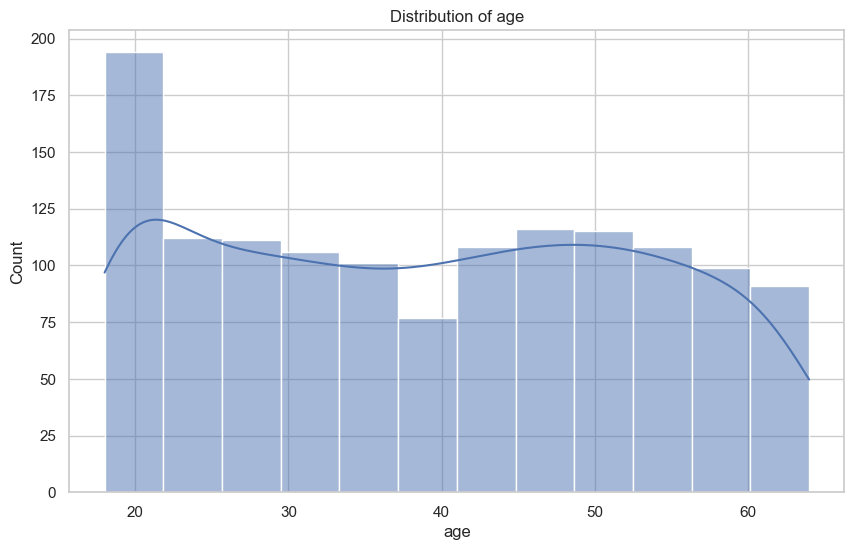

Axes(0.125,0.11;0.775x0.77)


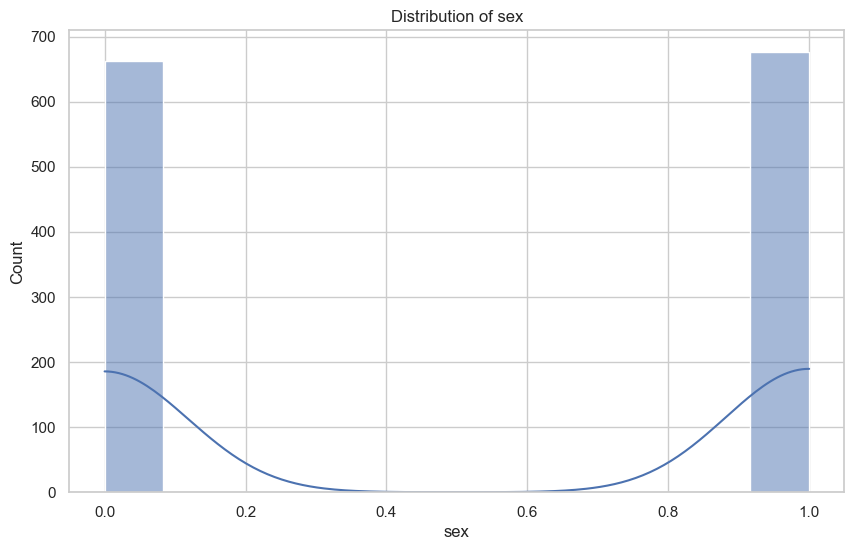

Axes(0.125,0.11;0.775x0.77)


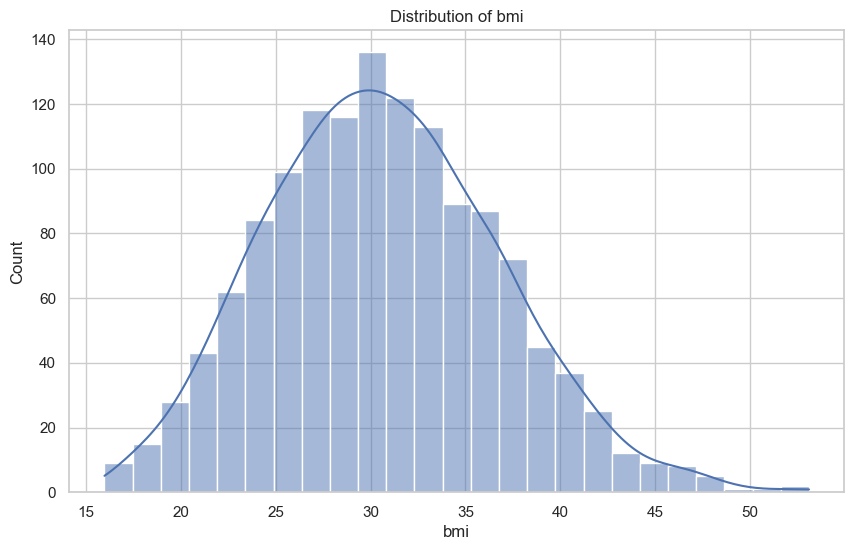

Axes(0.125,0.11;0.775x0.77)


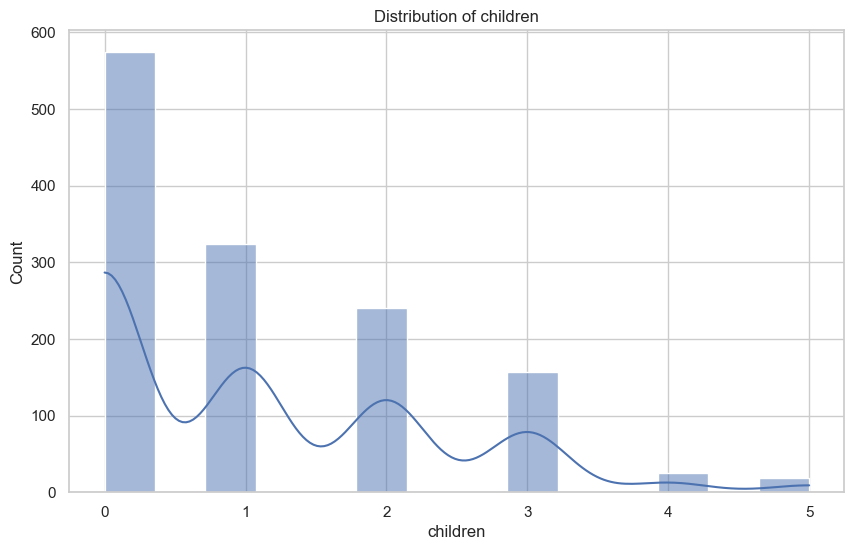

Axes(0.125,0.11;0.775x0.77)


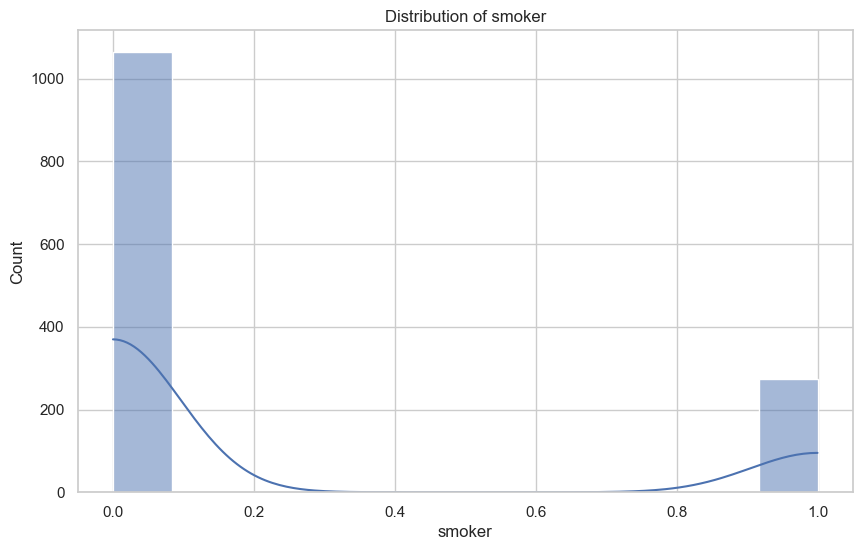

Axes(0.125,0.11;0.775x0.77)


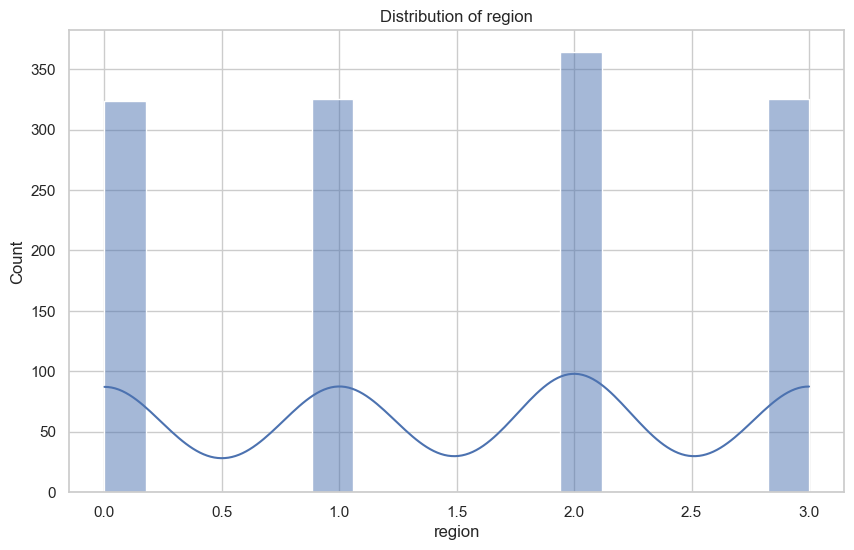

Axes(0.125,0.11;0.775x0.77)


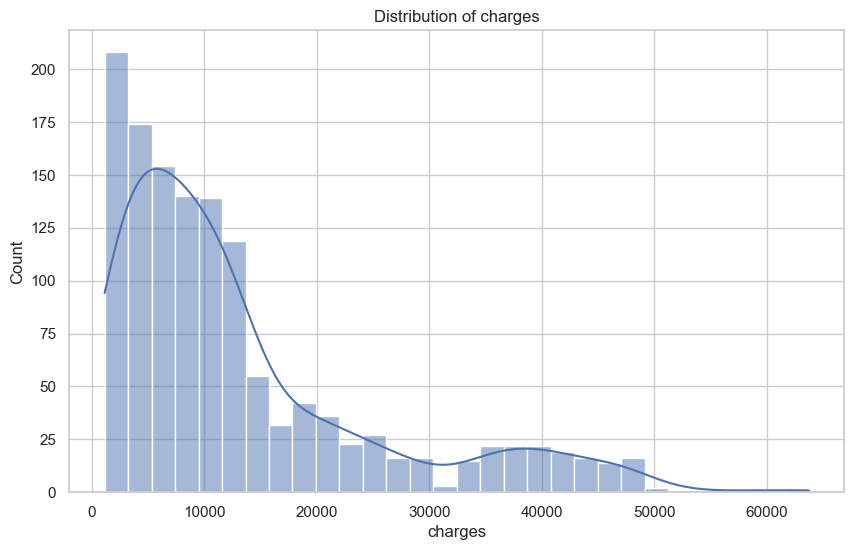

Axes(0.125,0.11;0.775x0.77)


In [10]:
# to check the distribution of all coumns using histplot
for i in df.select_dtypes(include=['int64','float']):
  sns.set(style="whitegrid")
  plt.figure(figsize=(10,6))
  his=sns.histplot(df[i],kde=True)
  plt.title(f"Distribution of {i}")
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()
  print(his)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


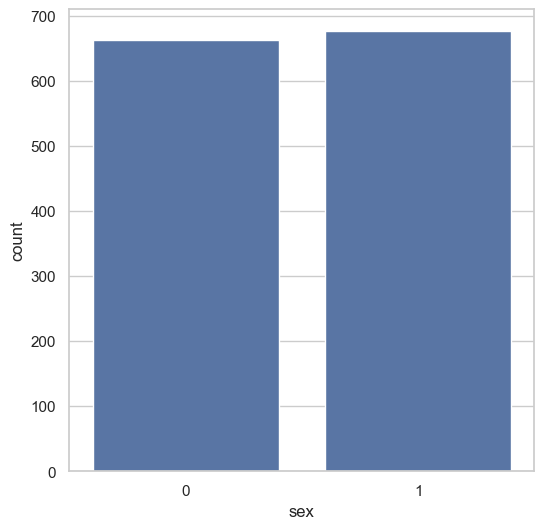

In [33]:
sns,set()
plt.figure(figsize=(6,6))
sns.countplot(x=df["sex"],data=df)
plt.show()

In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

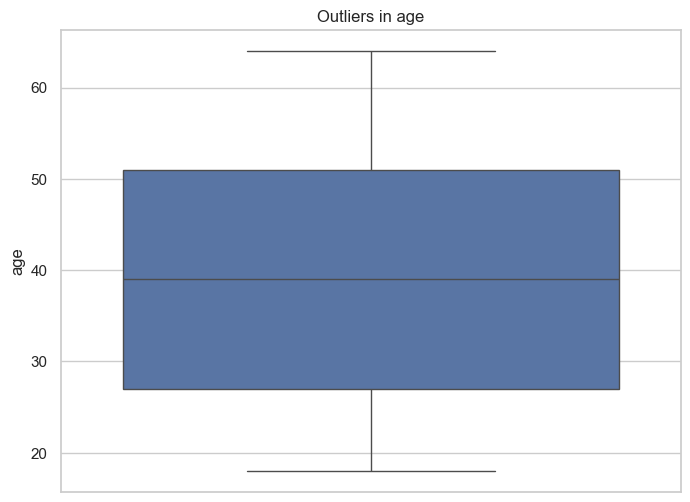

Axes(0.125,0.11;0.775x0.77)


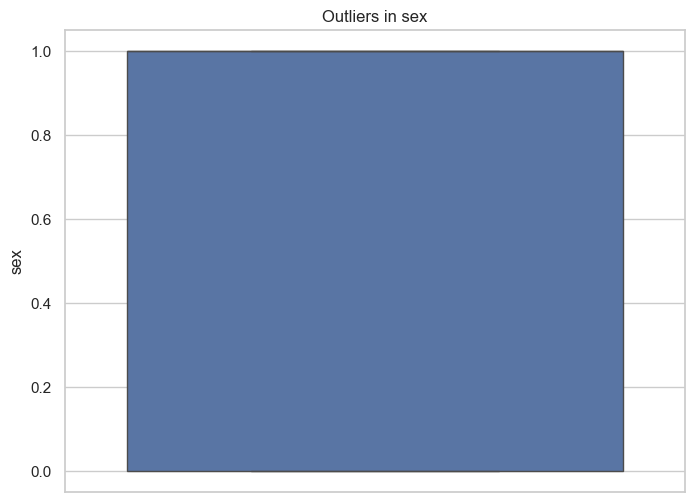

Axes(0.125,0.11;0.775x0.77)


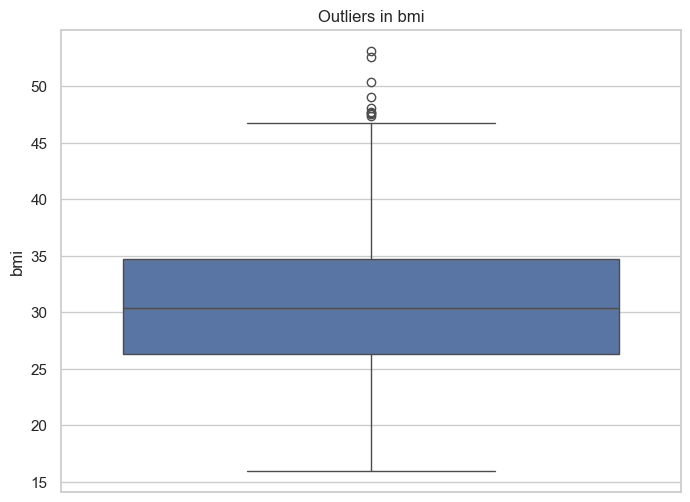

Axes(0.125,0.11;0.775x0.77)


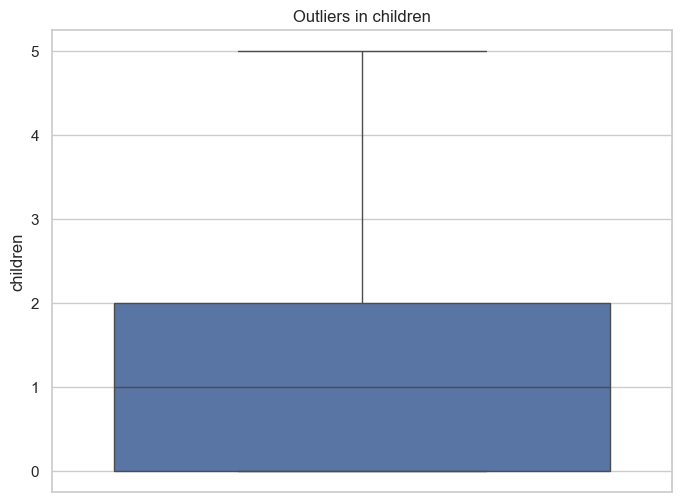

Axes(0.125,0.11;0.775x0.77)


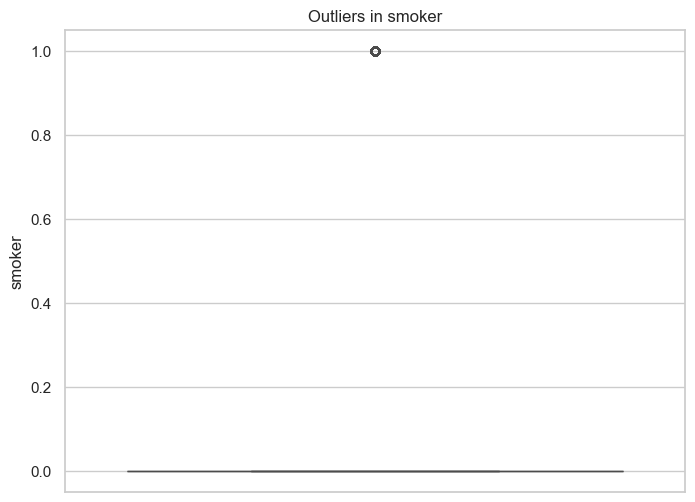

Axes(0.125,0.11;0.775x0.77)


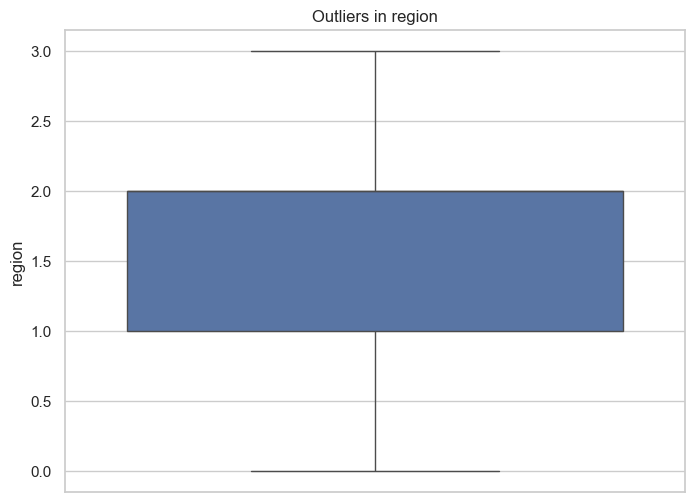

Axes(0.125,0.11;0.775x0.77)


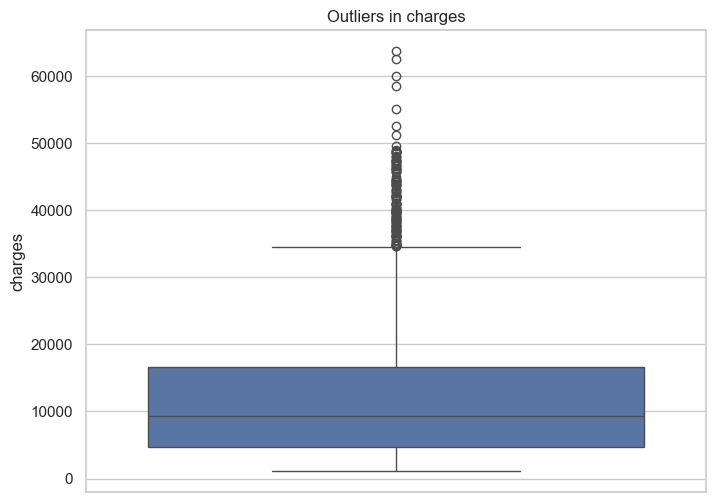

Axes(0.125,0.11;0.775x0.77)


In [12]:
# to check the outliers in datatset which include datatype having int and float
for i in df.select_dtypes(include=['int64','float']):
  plt.figure(figsize=(8,6))
  out=sns.boxplot(df[i])
  plt.title(f"Outliers in {i}")
  plt.show()
  print(out)

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
X=df.drop(columns=["charges"])
y=df["charges"]

In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_test

650      9800.88820
319      4667.60765
314     34838.87300
150      5125.21570
336     12142.57860
           ...     
873      6849.02600
746     11737.84884
275      9715.84100
186      3981.97680
1252    16232.84700
Name: charges, Length: 268, dtype: float64

In [43]:
lr.coef_

array([  255.9369454 ,   -82.0616962 ,   336.60498644,   455.2178947 ,
       23472.95215894,  -370.26541739])

In [44]:
y_pre=lr.predict(X_test)

In [45]:
r2_lr=r2_score(y_test,y_pre)

In [46]:
r2_lr

0.7998591998802311

In [47]:
from sklearn.linear_model import Ridge,Lasso

In [48]:
alpha=[100,500,700,800,900,1000]
for i in alpha:
  rg=Ridge(alpha=i)
  rg.fit(X,y)
  print(f"Alpha : {i},parameters of b1,b2,b3: {rg.coef_}")

Alpha : 100,parameters of b1,b2,b3: [  252.05620212   252.51281987   333.24830325   473.91033379
 16299.29866509  -339.95078214]
Alpha : 500,parameters of b1,b2,b3: [ 245.46454253  354.7321306   332.54858939  416.21586343 7213.36082919
 -280.47871392]
Alpha : 700,parameters of b1,b2,b3: [ 244.27612435  317.65676888  331.43438678  388.09524599 5642.42056537
 -256.19135993]
Alpha : 800,parameters of b1,b2,b3: [ 243.84830818  299.85425484  330.81545837  375.10671177 5088.46000786
 -245.40274491]
Alpha : 900,parameters of b1,b2,b3: [ 243.49134724  283.29400912  330.1732851   362.83720473 4633.59303166
 -235.41360955]
Alpha : 1000,parameters of b1,b2,b3: [ 243.18745219  268.06935558  329.51595279  351.25912074 4253.40589823
 -226.14876817]


In [49]:
rg_pred=rg.predict(X_test)

In [50]:
r2_rg=r2_score(rg_pred,y_pre)

In [51]:
r2_rg

-2.24895549529271

In [52]:
cv_score_rg=cross_val_score(Ridge(),X,y,cv=10)

In [53]:
cv_score_rg

array([0.78509349, 0.73258891, 0.73489023, 0.6730089 , 0.77081763,
       0.78349451, 0.79293464, 0.67137772, 0.74187296, 0.7621049 ])

In [54]:
cv_rg=cv_score_rg.mean()

In [55]:
cv_rg

np.float64(0.7448183876068326)

In [56]:
dtr = DecisionTreeRegressor()

In [57]:
dtr.fit(X_train,y_train) # fit the model

DecisionTreeRegressor()

In [58]:
y_pred_dt = dtr.predict(X_test) # predict the model

In [64]:
rmse = mean_squared_error(y_test,y_pred_dt,squared=False) # evaluate the model
print("Root mean squared error:",rmse)

Root mean squared error: 6255.615385534566


C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
r2_dt=r2_score(y_test,y_pred_dt)

In [65]:
r2_dt

0.7440558340528327

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor(n_estimators=200)

In [105]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [69]:
y_pred_rm = rf.predict(X_test)

In [70]:
# Evalute the model
rmse = mean_squared_error(y_test,y_pred_rm,squared=False)

print("Root mean squared error:",rmse)

Root mean squared error: 4211.231585964682


C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
r2_rf=r2_score(y_test,y_pred_rm) 

In [72]:
r2_rf

0.8840092367129738

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [74]:
lr_scaled=LinearRegression()

In [75]:
lr_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [76]:
# Prediction of datset of standerd scaler
y_pred_lr_s=lr.predict(X_test_scaled)

C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
y_pred_lr_s

array([-11379.4543008 , -11448.7047377 ,  11563.43457114, -11675.01716247,
       -11735.80650422, -11414.33744297, -11461.33565348, -11901.91106153,
       -11874.51440798, -11569.10284881, -11392.50839018, -11562.32932855,
       -11713.31331858,  12105.50206459, -11204.35475811,  11962.19308427,
       -11749.63089586, -11635.37565635,  11765.54390698,  12269.88452415,
        11748.03449073,  11982.06398204, -11523.82047456, -11442.48240922,
       -11802.86485653, -11664.1908953 , -11374.26209962, -11950.43013636,
       -11210.86763629, -11888.63411639, -11653.61702215, -11373.98274832,
       -11888.37895956, -11924.99331277, -11660.88292239, -11772.74023047,
       -11606.24341683, -11729.52570394, -11879.13606458, -11291.27787014,
       -11463.02948985, -11647.49536127, -11652.57812925,  11791.98090139,
       -11277.23536226, -11845.57184219, -11377.83888298, -11362.48909993,
       -11266.71880056, -11524.07296153, -11304.82860083, -11664.70235534,
        11541.17918459, -

In [78]:
r2_lr_sc=r2_score(y_test,y_pred_lr_s)

In [79]:
r2_lr_sc # The results are bad so applying standard scalar in difference models is not worth it

-1.9227850299823608

In [83]:
from xgboost import XGBRegressor

In [84]:
xg=XGBRegressor()

In [85]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
y_pre_xg=xg.predict(X_test)

In [87]:
y_pre

array([ 1.53479674e+04,  9.40113690e+03,  2.81127013e+04,  5.35381348e+03,
        1.14686878e+04,  1.11716178e+04,  2.82825807e+03,  2.28838437e+03,
        4.44602194e+03,  8.78825760e+03,  8.62004112e+03,  1.35029963e+04,
        1.32493093e+04,  2.95944214e+04,  1.36182862e+04,  3.07640444e+04,
        1.49756432e+04,  1.73547652e+03,  3.33250782e+04,  3.63431914e+04,
        3.31753700e+04,  4.07823101e+04,  3.13979661e+03,  1.00844089e+04,
        1.21694984e+01,  9.56941555e+03,  1.62680638e+04,  6.57848891e+03,
        1.45663962e+04, -4.43517019e+02,  9.21744669e+03,  1.63356443e+04,
        5.26825650e+03,  3.75991469e+03,  6.88269090e+03,  1.14432703e+04,
        1.75828281e+04,  6.96533805e+03,  9.81803475e+03,  1.15284190e+04,
        7.04157919e+03,  7.92072297e+03,  5.36251247e+03,  3.15360848e+04,
        7.29263953e+03,  2.39643012e+03,  1.30276252e+04,  1.37848625e+04,
        1.44747305e+04,  9.32398866e+03,  1.27044588e+04,  1.11434575e+04,
        2.70889535e+04,  

In [88]:
r2_xg=r2_score(y_test,y_pre_xg)

In [89]:
r2_xg

0.8628018798513803

In [91]:
cv_score_lr=cross_val_score(LinearRegression(),X,y,cv=10)  # Cross Validation Linear
cv_score_dt=cross_val_score(DecisionTreeRegressor(),X,y,cv=10) # Cross Validation Decision
cv_score_rm=cross_val_score(RandomForestRegressor(),X,y,cv=10) # Cross Validation Random

In [92]:
cv_score_dt  # Cross Validation Decision

array([0.78176152, 0.67542079, 0.69356744, 0.63465764, 0.7646508 ,
       0.7316718 , 0.71116443, 0.6806115 , 0.64678598, 0.71141907])

In [93]:
cv_score_rm # Cross Validation Random

array([0.86213889, 0.83367208, 0.81792451, 0.71674252, 0.85132232,
       0.88906037, 0.843264  , 0.79029804, 0.84536488, 0.86616253])

In [94]:
dt_cv=cv_score_dt.mean()

In [95]:
rm_cv=cv_score_rm.mean()

In [96]:
cv_lr=cv_score_lr.mean()

In [97]:
cv_score_xg=cross_val_score(XGBRegressor(max_iter=1000),X,y,cv=10)

C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Poornima\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)
C:\U

In [98]:
cv_score_xg

array([0.84339035, 0.81079802, 0.75990709, 0.68113423, 0.84493588,
       0.86819845, 0.85955504, 0.76273175, 0.80714318, 0.82812616])

In [99]:
xg_cv=cv_score_xg.mean()

In [100]:

print("Accuracy of Linear regression:",r2_lr*100)
print("Accuracy of Ridge Regression:",r2_rg*100)
print("Accuracy of Decision_Tree:",r2_dt*100)
print("Accuracy Score of random Forest :",r2_rf*100)
print("Accuracy Score of XGBoost Regressior:",r2_xg*100)

Accuracy of Linear regression: 79.98591998802311
Accuracy of Ridge Regression: -224.895549529271
Accuracy of Decision_Tree: 74.40558340528327
Accuracy Score of random Forest : 88.40092367129738
Accuracy Score of XGBoost Regressior: 86.28018798513804


In [101]:
print("Cross validation of Linear Regression with mean: ",cv_lr*100)
print("Cross validation of Decision Tree with mean: ",dt_cv*100)
print("Cross validation of Random Forest with mean: ",rm_cv*100)
print("Cross validation of XgBoost with mean: ",xg_cv*100)

Cross validation of Linear Regression with mean:  74.48047213193173
Cross validation of Decision Tree with mean:  70.3171096233955
Cross validation of Random Forest with mean:  83.15950130428675
Cross validation of XgBoost with mean:  80.65920134921802


In [104]:
data = {
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree", "Random Forest", "XGBoost Regressor"],
    "Accuracy (%)": [r2_lr*100, r2_rg*100, r2_dt*100, r2_rf*100, r2_xg*100],
    "Cross Validation Mean (%)": [cv_lr*100,cv_rg*100, dt_cv*100, rm_cv*100, xg_cv*100]
}


df_accuracy = pd.DataFrame(data)


print(df_accuracy)

               Model  Accuracy (%)  Cross Validation Mean (%)
0  Linear Regression     79.985920                  74.480472
1   Ridge Regression   -224.895550                  74.481839
2      Decision Tree     74.405583                  70.317110
3      Random Forest     88.400924                  83.159501
4  XGBoost Regressor     86.280188                  80.659201
